In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 

In [2]:
data = pd.read_csv("C:\\Users\kkris\\Desktop\\List of Countries by Sugarcane Production (1).csv")
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


## Data Cleaning

In [4]:
data["Production (Tons)"] = data["Production (Tons)"].str.replace(".","")
data["Production per Person (Kg)"] = data["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
data["Acreage (Hectare)"] = data["Acreage (Hectare)"].str.replace(".","")
data["Yield (Kg / Hectare)"] = data["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [5]:
df = data.drop( "Unnamed: 0", axis = 1)

In [6]:
data.rename(columns = {"Production (Tons)": "Production(Tons)"}, inplace = True)
data.rename(columns = {"Production per Person (Kg)": "Production_per_Person(Kg)"}, inplace = True)
data.rename(columns = {"Acreage (Hectare)":"Acreage(Hectare)"}, inplace = True)
data.rename(columns = {"Yield (Kg / Hectare)": "Yield(Kg / Hectare)"}, inplace = True)

In [7]:
data.isna().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg / Hectare)          1
dtype: int64

In [8]:
data[data["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [9]:
df = data.dropna().reset_index().drop("index", axis = 1)
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


## Univariate Analysis

<Axes: xlabel='Continent'>

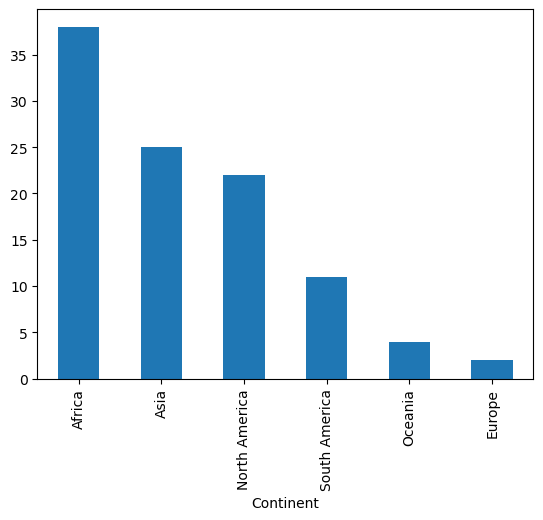

In [10]:
df["Continent"].value_counts().plot(kind = "bar")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 102 non-null    int64 
 1   Country                    102 non-null    object
 2   Continent                  102 non-null    object
 3   Production(Tons)           102 non-null    object
 4   Production_per_Person(Kg)  102 non-null    object
 5   Acreage(Hectare)           102 non-null    object
 6   Yield(Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.7+ KB


In [12]:
# Data Type Conversion 

df["Production(Tons)"] = df["Production(Tons)"].astype(int)
df["Production_per_Person(Kg)"] = df["Production_per_Person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(int)
df["Yield(Kg / Hectare)"] = df["Yield(Kg / Hectare)"].astype(float)

C:\Users\kkris\AppData\Local\Temp\ipykernel_20888\2133553339.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\kkris\AppData\Local\Temp\ipykernel_20888\2133553339.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_Person(Kg)"])
C:\Users\kkri

<Axes: xlabel='Yield(Kg / Hectare)', ylabel='Density'>

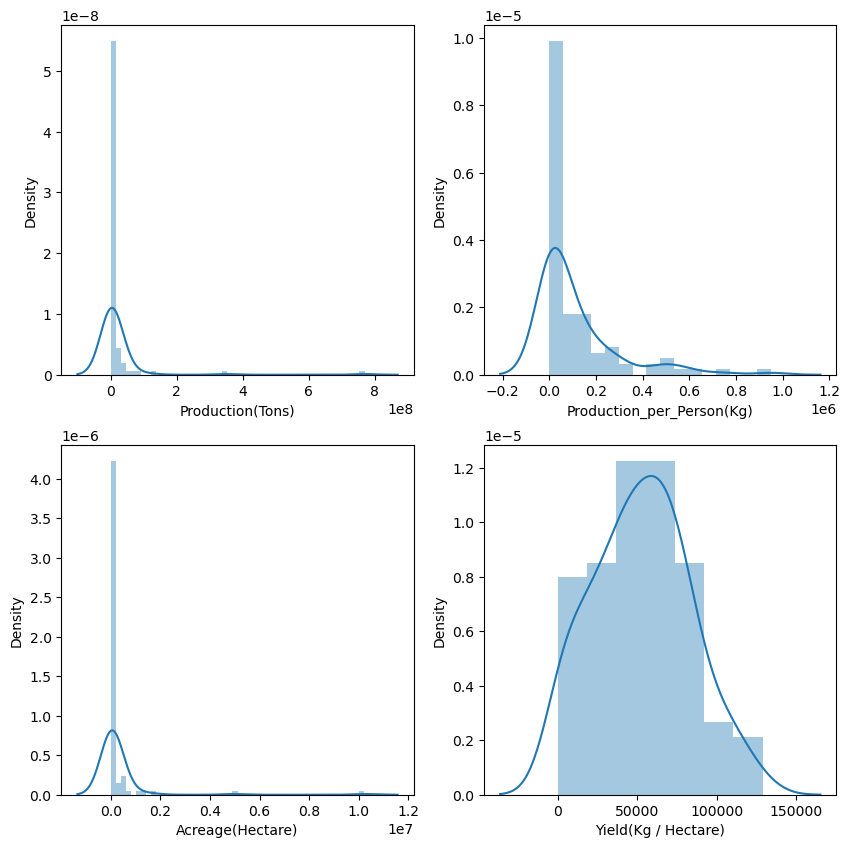

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg / Hectare)"])

<Axes: ylabel='Production(Tons)'>

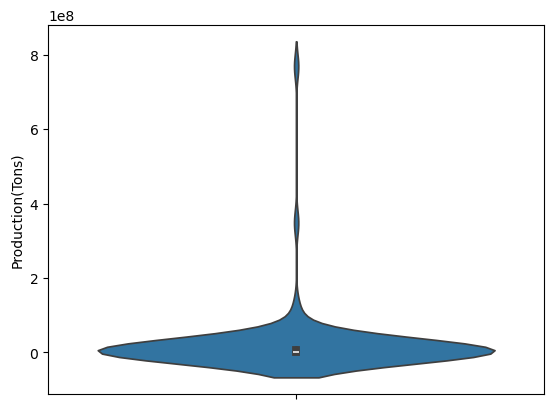

In [14]:
sns.violinplot(df["Production(Tons)"])

In [15]:
df.describe()

,Unnamed: 0,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
count,102.000000,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,50.529412,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,29.638985,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,0.000000,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,25.250000,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,50.500000,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,75.750000,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,102.000000,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Checking Outliers

<Axes: ylabel='Yield(Kg / Hectare)'>

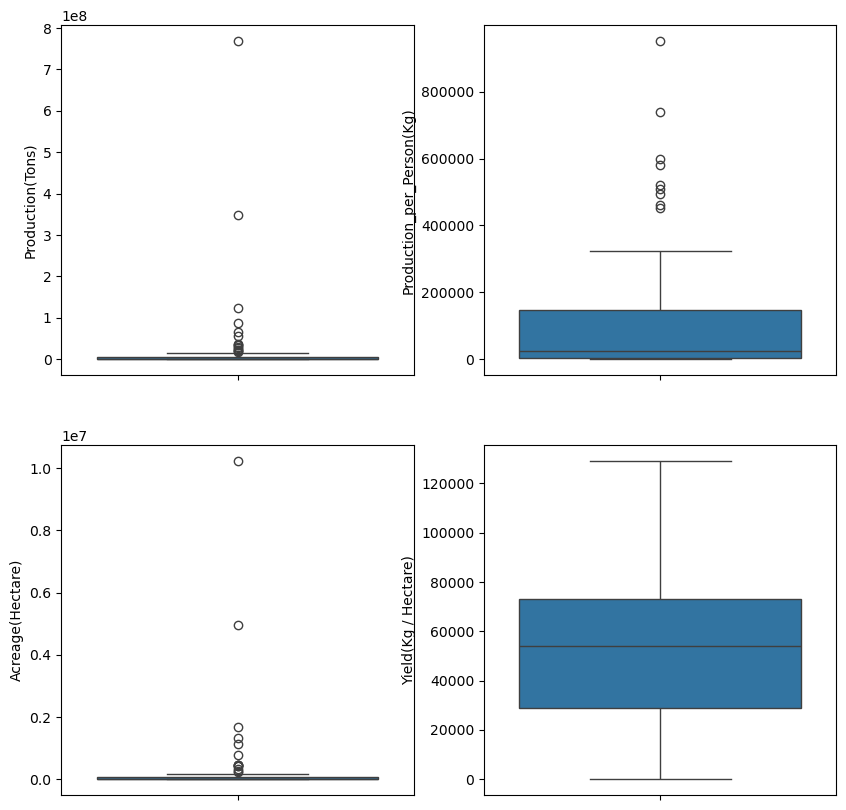

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person(Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg / Hectare)"])

## BiVariate Analysis

In [17]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721.000,4950000,70393.5
2,2,China,Asia,123059739,88287.000,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219.000,1130820,57879.0


## Bivariate Analysis 

## Which country produces maximum sugarcane?

In [18]:
d = df[["Country", "Production(Tons)"]].set_index("Country")
d.head()

,Production(Tons)
Country,
Brazil,768678382
India,348448000
China,123059739
Thailand,87468496
Pakistan,65450704


In [19]:
d["Production(Tons)_Percentage"] = d["Production(Tons)"]*100/d["Production(Tons)"].sum()
d

,Production(Tons),Production(Tons)_Percentage
Country,,
Brazil,768678382,4.072729e+01
India,348448000,1.846200e+01
China,123059739,6.520138e+00
Thailand,87468496,4.634389e+00
Pakistan,65450704,3.467809e+00
...,...,...
Spain,394,2.087551e-05
Lebanon,97,5.139401e-06
Singapore,50,2.649176e-06


<Axes: ylabel='Production(Tons)_Percentage'>

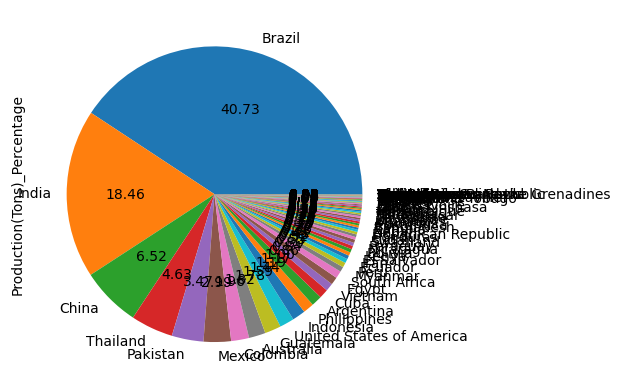

In [20]:
d["Production(Tons)_Percentage"].plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='Country'>

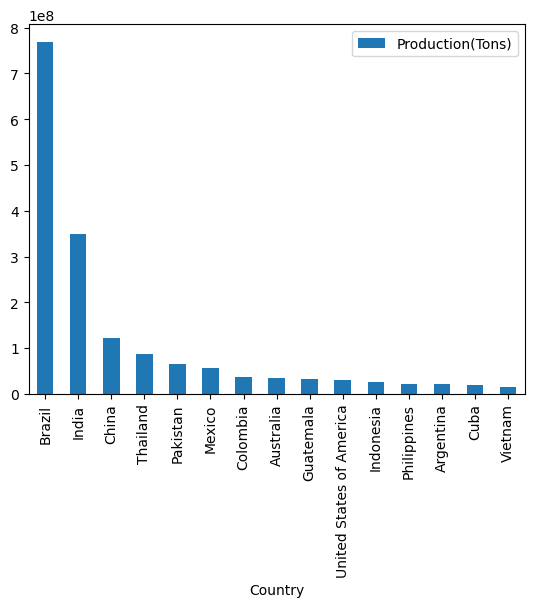

In [22]:
df[["Country", "Production(Tons)"]].set_index("Country").sort_values("Production(Tons)", ascending = False).head(15).plot(kind = "bar")

C:\Users\kkris\AppData\Local\Temp\ipykernel_20888\536322920.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


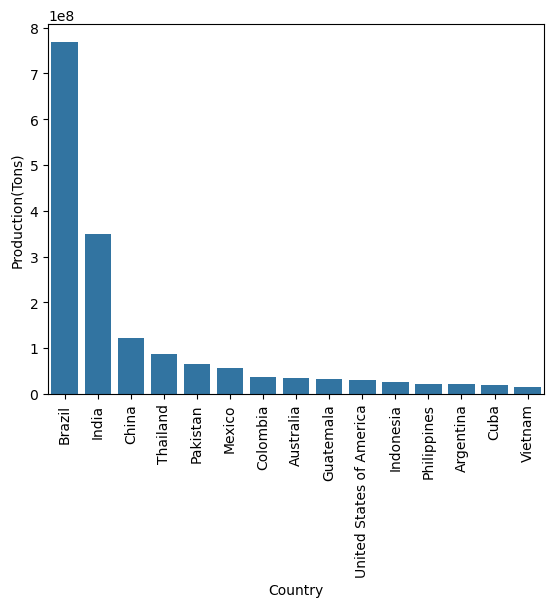

In [23]:
ax = sns.barplot(data = df.head(15), x = "Country", y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

## Which country has highest land?

C:\Users\kkris\AppData\Local\Temp\ipykernel_20888\2973715568.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


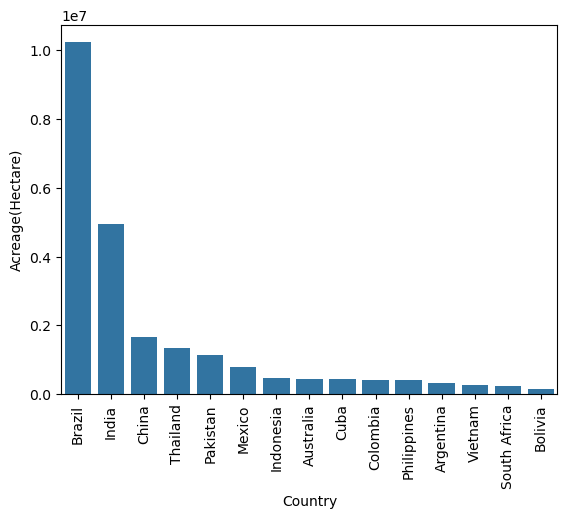

In [24]:
df_acr = df.sort_values("Acreage(Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

## Which country has hightest yield per hecatre?


C:\Users\kkris\AppData\Local\Temp\ipykernel_20888\3515532609.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


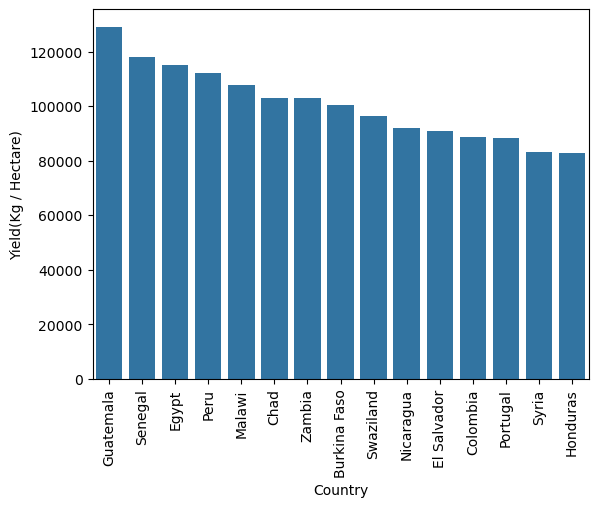

In [25]:
df_yield = df.sort_values("Yield(Kg / Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Yield(Kg / Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

## Which country has highest production 

C:\Users\kkris\AppData\Local\Temp\ipykernel_20888\1543583186.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


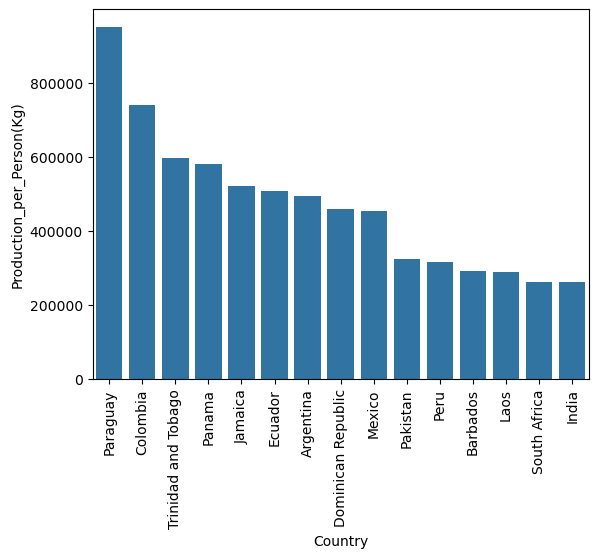

In [26]:
df_yield = df.sort_values("Production_per_Person(Kg)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_Person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

## Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

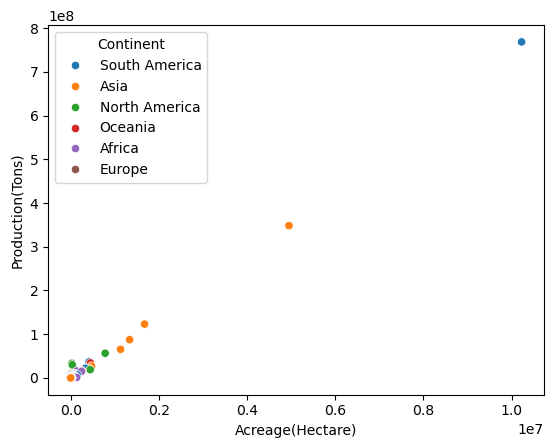

In [31]:
sns.scatterplot(data = df, x = "Acreage(Hectare)", y = "Production(Tons)", hue = "Continent" )

## Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg / Hectare)', ylabel='Production(Tons)'>

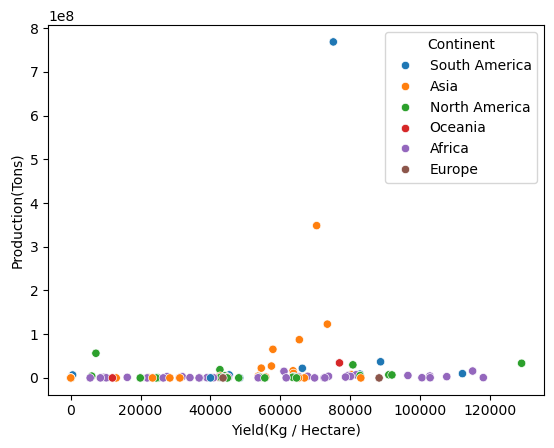

In [32]:
sns.scatterplot(data = df, x = "Yield(Kg / Hectare)" , y = "Production(Tons)", hue = "Continent")

## Analysis for continent

In [38]:
df_continent = df.groupby("Continent").sum()

In [37]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [35]:
df_continent

,Unnamed: 0,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare),number_of_countries
Continent,,,,,,,
Africa,2061,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472,2332636.293,1439089,2142107.5,38
Asia,1253,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425,1857769.303,10608319,1171871.4,25
Europe,189,PortugalSpain,5823,536.000,71,131870.9,2
North America,1101,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947,3796081.508,1581983,1082602.4,22
Oceania,227,AustraliaFijiPapua New GuineaSamoa,36177574,28593.605,490909,162419.1,4
South America,323,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126,3505531.738,11369236,677192.7,11


<Axes: xlabel='Continent'>

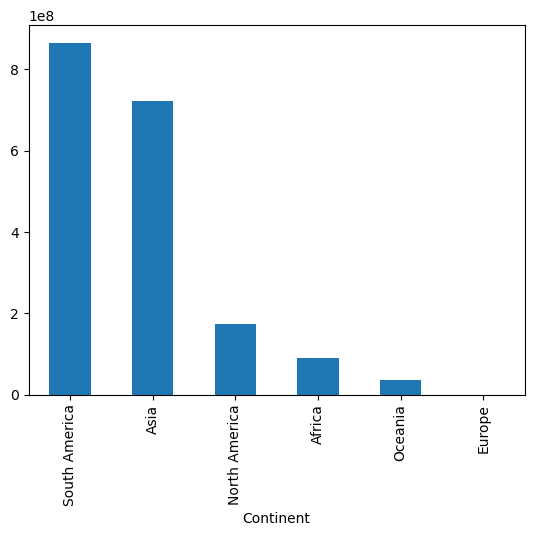

In [39]:
df_continent["Production(Tons)"].sort_values(ascending =  False).plot(kind = "bar")

## Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

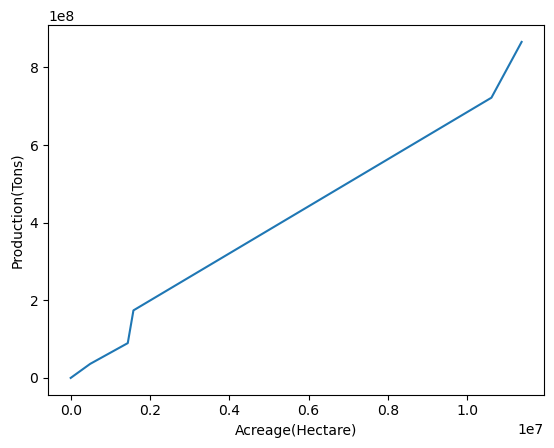

In [40]:
sns.lineplot(data = df_continent, x = "Acreage(Hectare)", y= "Production(Tons)" )

## Production distribution by continent

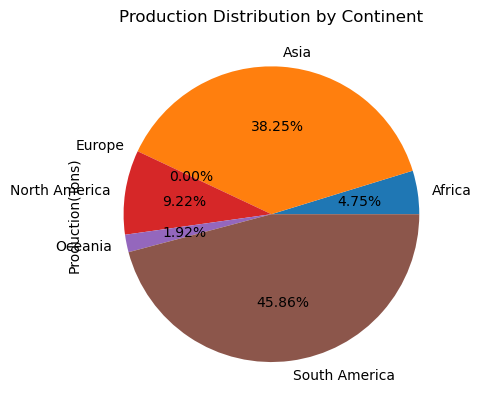

In [41]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()